# 00 IMDB Dataset Download and Analisys

## Preparation

### Setting the seeds for deterministic results


In [32]:
from utils.seed_setter import set_seed
set_seed()

## Downloading the IMDB Dataset

The first step is to download the dataset at: http://ai.stanford.edu/~amaas/data/sentiment/. <br>
It is then extracted in the directory: `./datasets/aclImdb`.


Next, we create a `Pandas` Dataframe Object containing the reviews of the dataframe in the column `text` and their sentiment in the column `sentiment`.

A sentiment value of `0` means that the review is negative, a value `1` means instead that it is a positive review.

Citation:
```
@InProceedings{maas-EtAl:2011:ACL-HLT2011,
  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
  title     = {Learning Word Vectors for Sentiment Analysis},
  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
  month     = {June},
  year      = {2011},
  address   = {Portland, Oregon, USA},
  publisher = {Association for Computational Linguistics},
  pages     = {142--150},
  url       = {http://www.aclweb.org/anthology/P11-1015}
}
```

In [33]:
import pandas as pd
import numpy as np
import os

df = pd.DataFrame(columns = ['text','sentiment'])

imdb_dir = "./datasets/aclImdb"

for dir_kind in ['train','test']:
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(imdb_dir, dir_kind, label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                
                with open(os.path.join(dir_name, fname), encoding = "utf8") as f:
                    df = df.append({'text': f.read(), 'sentiment': ['neg','pos'].index(label_type)}, ignore_index = True)
                f.close()

In [34]:
df.head()

,text,sentiment
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0


In [35]:
print(df['text'][0])

Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.


## Analisys

### Dataset instances balance
The dataset is balanced with 2500 positive reviews (`1`) and 2500 negative reviews (`0`).

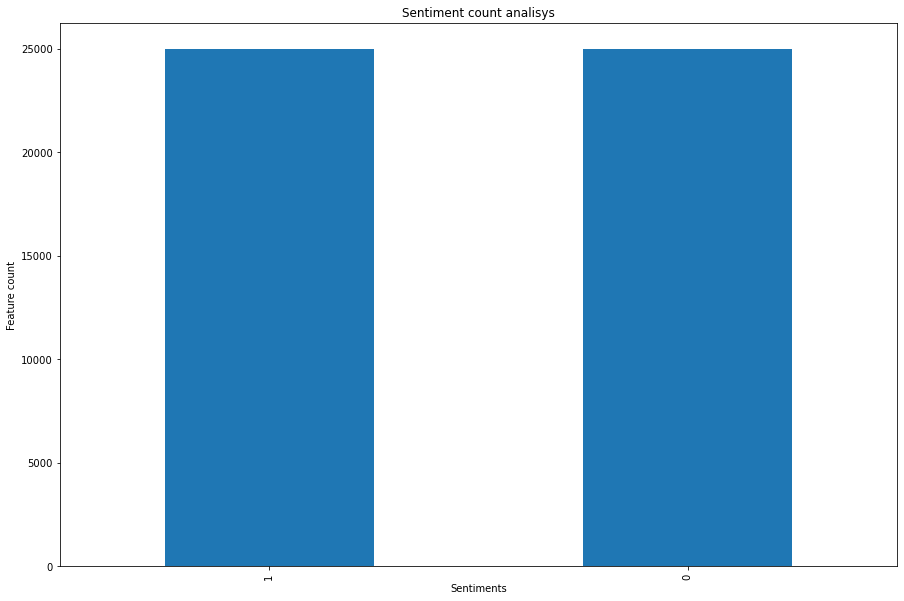

In [36]:
import matplotlib.pyplot as plt

ax = df['sentiment'].value_counts().plot.bar(figsize=(15,10), title = 'Sentiment count analisys')

ax.set(xlabel = 'Sentiments', ylabel = 'Feature count')

plt.show()

### HTML tags removal
HTML tags are present in some of the reviews and they need to be removed before we start any other preprocessing operation.

In [37]:
from bs4 import BeautifulSoup

print('Example of text containing html tags:')
df[df['text'].apply(lambda text: bool(BeautifulSoup(text, 'html.parser').find())) == 1]['text'].values[0]

Example of text containing html tags:


"Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son. The luxury jetliner takes off as planned but mid-air the plane is hi-jacked by the co-pilot Chambers (Robert Foxworth) & his two accomplice's Banker (Monte Markham) & Wilson (Michael Pataki) who knock the passengers & crew out with sleeping gas, they plan to steal the valuable cargo & land on a disused plane strip on an isolated island but while making his descent Chambers almost hits an oil rig in the Ocean & loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the Bermuda Triangle. With air in short supply, water leaking in & having flown over 200 miles off course the problems mount for 

In [38]:
df['text'] = df['text'].apply(lambda text: BeautifulSoup(text, 'lxml').text)

## Train and Test Data
Let's now split the dataframe into train ad test data.

We are gonna use the train and test data to train and test a sentiment analisys LSTM DNN model that we are going to build in the next notebook.

The test data alone will be then used for the adversarial attack.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size = 0.33, shuffle = True)

x_train = list(x_train)
x_test = list(x_test)

y_train = list(y_train)
y_test = list(y_test)

### Train and Test Data instances balance
The `train_test_split` function has picked a balanced amount of positive and negative sentiment reviews for both the train and test data

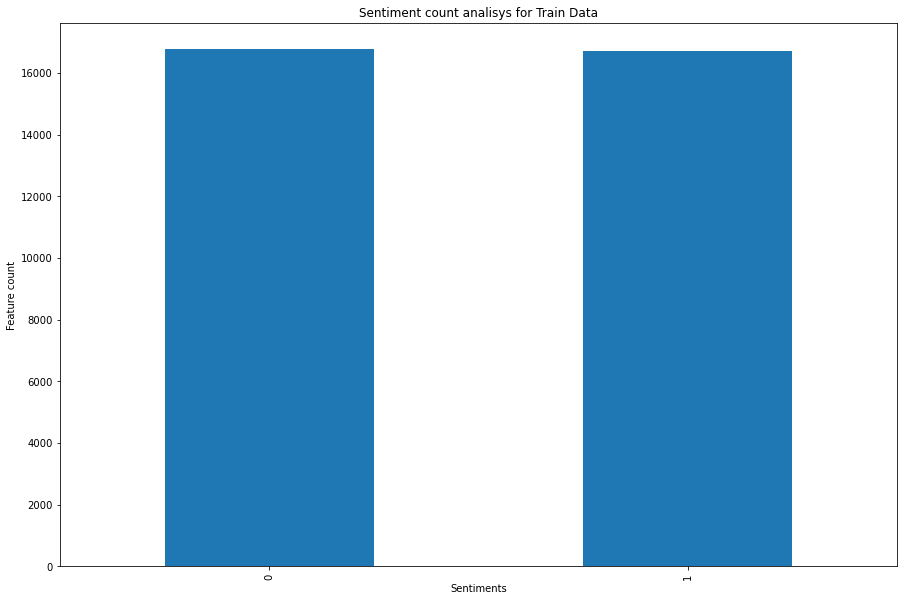

In [40]:
import matplotlib.pyplot as plt

ax = pd.Series(y_train).value_counts().plot.bar(figsize=(15,10), title = 'Sentiment count analisys for Train Data')

ax.set(xlabel = 'Sentiments', ylabel = 'Feature count')

plt.show()

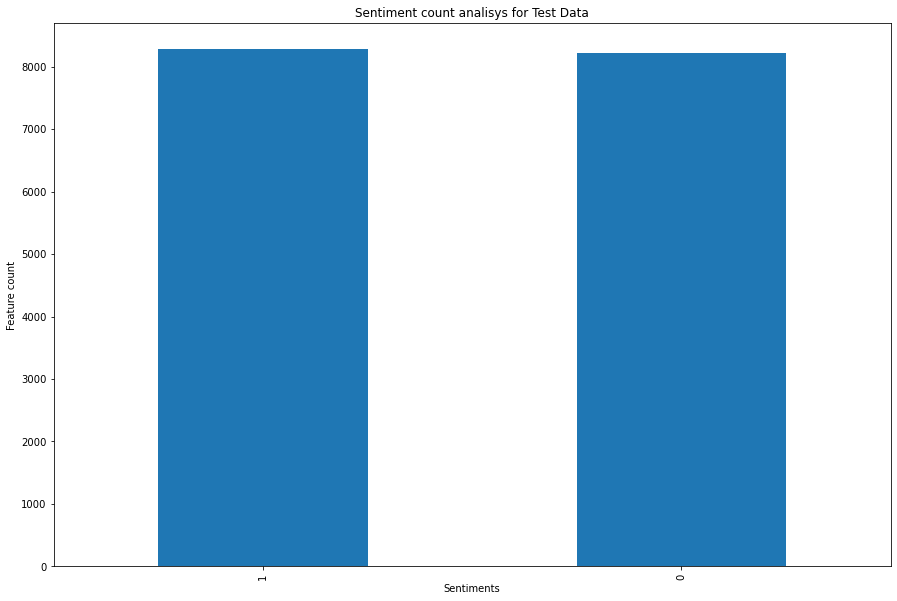

In [41]:
import matplotlib.pyplot as plt

ax = pd.Series(y_test).value_counts().plot.bar(figsize=(15,10), title = 'Sentiment count analisys for Test Data')

ax.set(xlabel = 'Sentiments', ylabel = 'Feature count')

plt.show()

### Saving the Train and Test Data

In [42]:
import os
import pickle

os.makedirs(os.path.join('./pickle_data/train_test_data'), exist_ok=True)

with open(os.path.join('./pickle_data/train_test_data/train_data.pickle'), 'wb') as f:
    pickle.dump([x_train, y_train], f)
f.close()

with open(os.path.join('./pickle_data/train_test_data/test_data.pickle'), 'wb') as f:
    pickle.dump([x_test, y_test], f)
f.close()